<a href="https://colab.research.google.com/github/lsh3163/AI-Homework/blob/main/Homerwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능 과제1

## Gathering some data

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

*  the` t_c `values are temperatures in Celsius
*  the `t_v `values are our unknown units



In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

## Choosing a linear model as a first try

In [3]:
def model(t_u, w, b):
  return w*t_u+b

## Mean Squared Error  
def loss_fn(t_p, t_c):
  squared_diffs = (t_p-t_c)**2
  return squared_diffs.mean()

In [4]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [5]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

## Decreasing loss

In [6]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w-delta, b), t_c)) / (2.0*delta)

In [7]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [8]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / (2.0*delta)
b = b - learning_rate * loss_rate_of_change_b

## Applying the derivatives to the model

In [9]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def model(t_u, w, b):
  return w*t_u+b

## Defining the Gradient Function

In [10]:
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [11]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
  for epoch in range(1, n_epochs+1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad
    if epoch in (1, 2, 3, 10, 11, 99, 100, 4000, 5000):
      print("Epoch %d, Loss %f" % (epoch, float(loss)))
      if print_params:
        print(' Params:', params)
        print(' Grad:', grad)
      if epoch in (4, 12, 101):
        print('...')
      if not torch.isfinite(loss).all():
        break
  return params

In [12]:
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
 Params: tensor([-44.1730,  -0.8260])
 Grad: tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
 Params: tensor([2568.4011,   45.1637])
 Grad: tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
 Params: tensor([-148527.7344,   -2616.3931])
 Grad: tensor([15109614.0000,   266155.6875])
Epoch 10, Loss 90901105189019073810297959556841472.000000
 Params: tensor([3.2144e+17, 5.6621e+15])
 Grad: tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
 Params: tensor([-1.8590e+19, -3.2746e+17])
 Grad: tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

## Hyperparameter tuning

In [13]:
training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
 Params: tensor([ 0.5483, -0.0083])
 Grad: tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
 Params: tensor([ 0.3623, -0.0118])
 Grad: tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
 Params: tensor([ 0.2858, -0.0135])
 Grad: tensor([765.4666,  16.5122])
Epoch 10, Loss 29.105247
 Params: tensor([ 0.2324, -0.0166])
 Grad: tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
 Params: tensor([ 0.2323, -0.0169])
 Grad: tensor([0.5781, 3.0384])
Epoch 99, Loss 29.023582
 Params: tensor([ 0.2327, -0.0435])
 Grad: tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
 Params: tensor([ 0.2327, -0.0438])
 Grad: tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

## Normalizing inputs

In [14]:
t_un = 0.1 * t_u

params = training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
 Params: tensor([1.7761, 0.1064])
 Grad: tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
 Params: tensor([2.0848, 0.1303])
 Grad: tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
 Params: tensor([2.2094, 0.1217])
 Grad: tensor([-12.4631,   0.8587])
Epoch 10, Loss 29.030489
 Params: tensor([ 2.3232, -0.0710])
 Grad: tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
 Params: tensor([ 2.3284, -0.1003])
 Grad: tensor([-0.5240,  2.9264])
Epoch 99, Loss 22.214186
 Params: tensor([ 2.7508, -2.4910])
 Grad: tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
 Params: tensor([ 2.7553, -2.5162])
 Grad: tensor([-0.4446,  2.5165])


In [15]:
t_un = 0.1 * t_u

training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
 Params: tensor([1.7761, 0.1064])
 Grad: tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
 Params: tensor([2.0848, 0.1303])
 Grad: tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
 Params: tensor([2.2094, 0.1217])
 Grad: tensor([-12.4631,   0.8587])
Epoch 10, Loss 29.030489
 Params: tensor([ 2.3232, -0.0710])
 Grad: tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
 Params: tensor([ 2.3284, -0.1003])
 Grad: tensor([-0.5240,  2.9264])
Epoch 99, Loss 22.214186
 Params: tensor([ 2.7508, -2.4910])
 Grad: tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
 Params: tensor([ 2.7553, -2.5162])
 Grad: tensor([-0.4446,  2.5165])
Epoch 4000, Loss 2.927680
 Params: tensor([  5.3643, -17.2853])
 Grad: tensor([-0.0006,  0.0033])
Epoch 5000, Loss 2.927648
 Params: tensor([  5.3671, -17.3012])
 Grad: tensor([-0.0001,  0.0006])


tensor([  5.3671, -17.3012])

The exact vlaues would be w=5.3671 and b=-17.3012

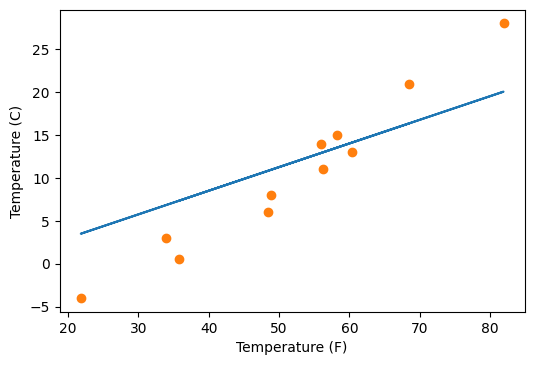

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=100)
plt.xlabel("Temperature (F)")
plt.ylabel("Temperature (C)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## Autograd : Backpropagating all things

In [17]:
params = torch.tensor([1.0,0.0], requires_grad=True)
params

tensor([1., 0.], requires_grad=True)

In [18]:
if params.grad is not None:
  params.grad.zero_()

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

## Training

In [19]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs+1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" % (epoch, float(loss)))
  return params

In [20]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [21]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_multi_tensor',
 'functional',
 'lr_scheduler',
 'swa_utils']

In [22]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs+1):
    

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" % (epoch, float(loss)))
  return params

In [23]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate=1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer=optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c
)


Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [24]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate=1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer=optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c
)


Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645


tensor([  0.5368, -17.3048], requires_grad=True)

## Spliting a Dataset

In [25]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 4,  0, 10,  1,  6,  8,  7,  9,  2]), tensor([3, 5]))

In [26]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [27]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs+1):
    
    if params.grad is not None:
      params.grad.zero_()  
    with torch.set_grad_enabled(True):
      train_t_p = model(train_t_u, *params)
      train_loss = loss_fn(train_t_p, train_t_c)
    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch<=3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss{val_loss.item():.4f}")
  return params

In [28]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    val_t_u=val_t_un,
    train_t_c=train_t_c,
    val_t_c=val_t_c
)

Epoch 1, Training loss 53.5444, Validation loss201.0541
Epoch 2, Training loss 30.5667, Validation loss115.4398
Epoch 3, Training loss 25.5510, Validation loss85.4571
Epoch 500, Training loss 7.7695, Validation loss21.5329
Epoch 1000, Training loss 4.1600, Validation loss9.2849
Epoch 1500, Training loss 3.3756, Validation loss5.3324
Epoch 2000, Training loss 3.2051, Validation loss3.8717
Epoch 2500, Training loss 3.1681, Validation loss3.2738
Epoch 3000, Training loss 3.1600, Validation loss3.0131


tensor([  5.0943, -16.0027], requires_grad=True)

## Homework 

### Gathering Dataset

In [29]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [30]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  8, 10,  1,  9,  3,  7,  6,  4]), tensor([5, 0]))

In [31]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

**A. What parts of the training loop, and so on, need to change to accommodate this redefinition?**



*   model 함수를 일차함수가 아닌 2차함수로 바꾸어야 합니다. 





In [32]:
def model(t_u, w1, w2, b):
  return w1*(t_u)*(t_u) + w2 * t_u + b

## Mean Squared Error  
def loss_fn(t_p, t_c):
  squared_diffs = (t_p-t_c)**2
  return squared_diffs.mean()

**B. What parts are agnostic to swapping out the model?**



*   loss function과 optimizer 등이 모델 구조에 관계없이 자유롭습니다. 
* 데이터 구성 역시 영향을 받지 않습니다. 



**C. Is the resulting loss higher or lower after training?**



*   loss가 학습에 진행됨에 따라 커집니다. 



In [33]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs+1):
    
    if params.grad is not None:
      params.grad.zero_()  
    with torch.set_grad_enabled(True):
      train_t_p = model(train_t_u, *params)
      train_loss = loss_fn(train_t_p, train_t_c)
    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch<=3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss{val_loss.item():.4f}")
  return params

In [34]:
params = torch.tensor([-1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    val_t_u=val_t_un,
    train_t_c=train_t_c,
    val_t_c=val_t_c
)

Epoch 1, Training loss 2075.6345, Validation loss411.8989
Epoch 2, Training loss 1389392.2500, Validation loss400968.2500
Epoch 3, Training loss 936391744.0000, Validation loss266650976.0000
Epoch 500, Training loss nan, Validation lossnan
Epoch 1000, Training loss nan, Validation lossnan
Epoch 1500, Training loss nan, Validation lossnan
Epoch 2000, Training loss nan, Validation lossnan
Epoch 2500, Training loss nan, Validation lossnan
Epoch 3000, Training loss nan, Validation lossnan


tensor([nan, nan, nan], requires_grad=True)

**D. Is the actual result better or worse?**



*   실제 결과는 더 안 좋습니다. loss function의 backpropagation이 이차함수에 맞춰 구현이 되어있지 않기 때문입니다. 
